In [1]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
def plot_history (history, save_graph_img_path, fig_size_width, fig_size_height, lim_font_size) :
    
    acc = history.history [ 'accuracy']
    val_acc = history.history [ 'val_accuracy']
    loss = history.history [ 'loss']
    val_loss = history.history [ 'val_loss']
    epochs = range (len (acc))
    
    plt.figure (figsize = (fig_size_width, fig_size_height))
    plt.rcParams [ 'font.family'] = 'Times New Roman'
    plt.rcParams [ 'font.size'] = lim_font_size 
    
    # plot accuracy values
    plt.plot (epochs, acc, color = "blue",linestyle = "solid", label = 'train acc')
    plt.plot (epochs, val_acc, color = "green", linestyle = "solid", label = 'valid acc')
    plt.plot (epochs, loss, color = "red", linestyle = "solid", label = 'train loss')
    plt.plot (epochs, val_loss, color = "orange", linestyle = "solid", label = 'valid loss')
    # plt.title ( 'Training and Validation loss')
    
    plt.legend ()
    plt.grid ()
    plt.savefig (save_graph_img_path)
    plt.close ()

In [3]:
# CNN

# 1. 하이퍼 매개변수 (배치크기, 클래스분류, 학습 반복 횟수(epochs), drop 율 변수)
batch_size = 128
num_classes = 10  # 필기 0~9까지
epochs = 5
dropout_rate = 0.2  # 지나친 학습 방지 : 입력의 20%를 0으로 준다.

# 2. 입력 이미지 매개변수 (폭, 높이, 흑백픽셀)
img_width = 28
img_height = 28
img_ch = 1  # 흑백에서 학습할 수 있도록 지정

# 3. 데이터 저장을 위한 디렉토리
save_path = 'C:\\DL\\'

# 4. 차트 이미지의 크기
fig_size_w = 12
fig_size_h = 10
fig_font_size = 25

# 5. 디렉토리가 없을 경우 만들기
os.makedirs(save_path, exist_ok=True)

# 6. 입력 데이터 수 ( 28 * 28 = 784 )
num_input = int(img_width * img_height)
num_input

# 7. 데이터 셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 8. 각 이미지 데이터를 28 * 28 * 1 로 사이즈 변경
x_train = x_train.reshape( x_train.shape[0], img_width, img_height, img_ch)
x_test = x_test.reshape( x_test.shape[0], img_width, img_height, img_ch)

# 9. 데이터 형변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 10. 정규화 = 0 ~ 255 , 0.0 ~ 1.0 값으로 변환
x_train /= 255
x_test /= 255

# 11. 카테고리 변수를 학습할 수 있도록 0과 1로 처리 : one-hot
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train
y_test

# 12. 데이터셋 확인
print( x_train.shape[0] )
print( x_test.shape[0] )

60000
10000


CNN ( 회선신경망 )

< 입력층 > : 28 * 28 * 1
- 2차원 회선 층
  - Conv2D : 2차원 회선층의 이미지에서 특징 추출 ( 활성화 함수 : relu )
  - 입력 데이터 커널 ( 3 * 3 의 32종류 )
  - 출력단위 ( 32장의 분량의 출력 데이터를 리턴 )
  
- 2차원 회선 층
  - Conv2D : 2차원 회선층의 이미지에서 특징 추출 ( 활성화 함수 : relu )
  - 입력 데이터 커널 ( 3 * 3 의 64종류의 필터를 각 칸에 적용 )
  - 출력단위 ( 64장의 분량의 출력 데이터를 리턴 )

< 폴링층 >

- 특징 샘플을 압축하는 층 ( 견고, 과학습 방지 계산, 비용 억제 )
- 회선층에서 추출된 특징 샘플의 위치를 약간 낮춘다.
- 이미지의 위치가 약간 변화되더라도 풀링층에서 보편화 된다.
- 이미지의 공간 크기를 작게 조정하는 매개변수의 수를 줄이기 때문에 과학습 방지가 된다.


< 전체 결합층 >

- 0~9 까지의 손글씨가 10 분류가 된 문제 때문에 
- 활성화 함수 : softmax함수 
    - 함수의 총합이 1 이 되도록 각 출력의 예측 확률 계산
- ex) 0.7, 0, 0, 0, 0, 0, 0.2, 0, 0, 1.0  -> 0 확률 : 70%, 6확률 : 20%, 9확률 10%


In [5]:
# 모델 구축
model = Sequential()  # 순차 모델
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', 
                 input_shape=(img_width, img_height, img_ch) ))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu' ))

# 풀링층 : 2 * 2 크기의 최대 풀링층 입력 이미지내의 2*2 영역의 최대수치를 출력
model.add( MaxPooling2D( pool_size=(2,2) ) )

# 과학습 방지
model.add( Dropout(dropout_rate) )

# 차원 감소 후 1차원 벡터로 변환
model.add(Flatten())

# 전체 결합층
model.add( Dense( num_classes, activation = 'softmax') )

# 모델 구조 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
________________________________________________

In [6]:
# 컴파일 ( 다클래스 분류 문제 )
model.compile( loss = 'categorical_crossentropy', optimizer=RMSprop(), 
              metrics=['accuracy'])

# 모델 학습 , train 중 10% 검증 데이터로 하겠다.
history = model.fit( x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    verbose = 1, validation_split = 0.1 )

# 성능 측정 : 테스트 데이터 셋에서 학습된 분류 모델기에 입력해서 성능 측정
score = model.evaluate( x_test, y_test, verbose = 0)

# 성능값 출력
print('test loss : ', score[0])
print('test accuracy : ',score[1])

# history 를 그래프로 저장
plot_history(history, save_graph_img_path=save_path + 'res.png',
             fig_size_width=fig_size_w, fig_size_height=fig_size_h, lim_font_size=fig_font_size)

# 모델 구조 저장
open(save_path+'model02.json', 'w').write(model.to_json())

# 학습에서 사용한 가중치 저장
model.save_weights(save_path + 'weight.hdf5')

# 학습 이력 저장
with open (save_path + 'history.json','wb') as f :
    pickle.dump(history.history, f)


Epoch 1/5
422/422 [==============================] - 35s 83ms/step - loss: 0.4178 - accuracy: 0.8674 - val_loss: 0.0650 - val_accuracy: 0.9820
Epoch 2/5
422/422 [==============================] - 34s 80ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.0499 - val_accuracy: 0.9870
Epoch 3/5
422/422 [==============================] - 34s 80ms/step - loss: 0.0502 - accuracy: 0.9860 - val_loss: 0.0445 - val_accuracy: 0.9882
Epoch 4/5
422/422 [==============================] - 34s 80ms/step - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0419 - val_accuracy: 0.9875
Epoch 5/5
422/422 [==============================] - 34s 81ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0408 - val_accuracy: 0.9897
test loss :  0.03380772843956947
test accuracy :  0.9890000224113464


Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4015 - accuracy: 0.8744 - val_loss: 0.0933 - val_accuracy: 0.9705
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0850 - accuracy: 0.9726 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.0873 - val_accuracy: 0.9735
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0711 - val_accuracy: 0.9831
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0928 - val_accuracy: 0.9769
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0810 - val_accuracy: 0.9816
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0934 - val_accuracy: 0.9797
Epoch 

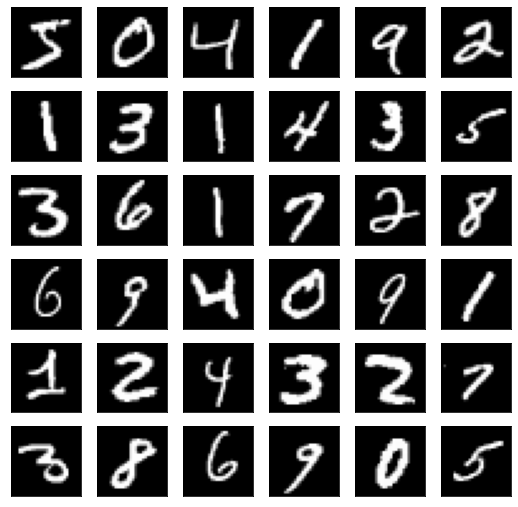

In [7]:
# exam) 같은 내용의 다른 코드 작성
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
fig = plt.figure(figsize = (9,9))

for i in range(36):
    res = fig.add_subplot(6,6, i+1, xticks=[], yticks=[])
    res.imshow(x_train[i], cmap='gist_gray')
    
# 28 * 28 = 784 개, 0~1.0 변환
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# 인코딩 one-hot
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)

# 모델 (순차 모델)
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,)))
# model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# 컴파일
model.compile( loss = 'categorical_crossentropy', optimizer=RMSprop(), 
              metrics=['accuracy'])

# 학습
history = model.fit( x_train, y_train, batch_size = 128, epochs = 20, 
                    verbose = 1, validation_data = (x_test, y_test) )


[0.9318333268165588, 0.9744166731834412, 0.9836000204086304, 0.988016664981842, 0.9908666610717773, 0.9930999875068665, 0.9941999912261963, 0.9956666827201843, 0.996233344078064, 0.9967833161354065, 0.9970666766166687, 0.9972500205039978, 0.9973666667938232, 0.9979833364486694, 0.9976999759674072, 0.9978833198547363, 0.99836665391922, 0.9984999895095825, 0.9984333515167236, 0.9987833499908447]
[0.9704999923706055, 0.9753000140190125, 0.9735000133514404, 0.9830999970436096, 0.9768999814987183, 0.9815999865531921, 0.9797000288963318, 0.9830999970436096, 0.9765999913215637, 0.9781000018119812, 0.9812999963760376, 0.9782999753952026, 0.9811000227928162, 0.9836000204086304, 0.9815999865531921, 0.9822999835014343, 0.982200026512146, 0.9822999835014343, 0.9818000197410583, 0.9836999773979187]


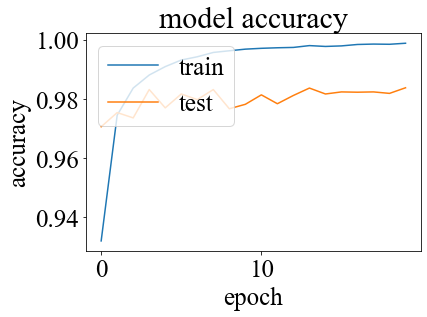

[0.21966902911663055, 0.08177261054515839, 0.054360147565603256, 0.039532992988824844, 0.02821127325296402, 0.022904174402356148, 0.019279545173048973, 0.015756741166114807, 0.013324969448149204, 0.010435293428599834, 0.010379072278738022, 0.009289194829761982, 0.009015125222504139, 0.0077566122636199, 0.007313608191907406, 0.007270121481269598, 0.0061665670946240425, 0.006186522077769041, 0.00610671890899539, 0.005385708063840866]
[0.09327200055122375, 0.08095958828926086, 0.08725261688232422, 0.07114099711179733, 0.0928291454911232, 0.08101534843444824, 0.09343387186527252, 0.08211612701416016, 0.1292986273765564, 0.13755835592746735, 0.11113930493593216, 0.14293444156646729, 0.13100044429302216, 0.1336486041545868, 0.14135001599788666, 0.14357684552669525, 0.15526828169822693, 0.16086024045944214, 0.17959143221378326, 0.14461743831634521]


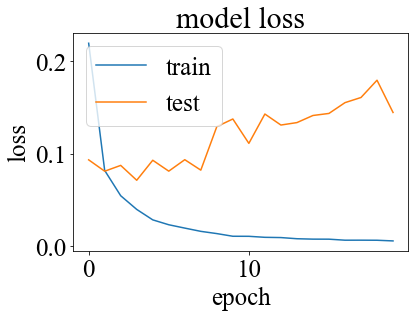

In [8]:
# accuracy 결과값 
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# loss 결과값
print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [9]:
# h5py 파일 읽기
import h5py

filename= 'C:\\DL\\weight.hdf5'

def read_hdf5(path):
    weights = {}
    keys = []
    
    with h5py.File(path, 'r') as f :
        f.visit(keys.append)
        for key in keys:
            if ':' in key :
                print(f[key].name)
                weights[f[key].name] = f[key].value
    return weights

read_hdf5(filename)

/conv2d_2/conv2d_2/bias:0
/conv2d_2/conv2d_2/kernel:0
/conv2d_3/conv2d_3/bias:0
/conv2d_3/conv2d_3/kernel:0
/dense_1/dense_1/bias:0
/dense_1/dense_1/kernel:0


<ipython-input-9-982846b80418>:15: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  weights[f[key].name] = f[key].value


{'/conv2d_2/conv2d_2/bias:0': array([-0.02799231,  0.02755896,  0.00018146,  0.00861604,  0.01205947,
        -0.01458433, -0.00053129,  0.04462432, -0.01685385, -0.01238567,
        -0.01408755, -0.00342979,  0.0509565 , -0.01364233, -0.01582043,
        -0.04362404,  0.05892861,  0.00459574,  0.02280301,  0.08568765,
        -0.01929111, -0.01703915,  0.05413402, -0.00755766,  0.03727572,
         0.08017504,  0.00368563, -0.00917369,  0.01462759, -0.0087234 ,
         0.05159656, -0.01332592], dtype=float32),
 '/conv2d_2/conv2d_2/kernel:0': array([[[[-0.04630127, -0.21211536, -0.1871352 , -0.18920138,
           -0.02711455,  0.0073589 , -0.04580472,  0.12336871,
            0.05984272,  0.05806997, -0.18929616, -0.08455576,
            0.12211372, -0.04703742, -0.09874423,  0.22561279,
           -0.18770875,  0.01776198,  0.05911618, -0.07591699,
            0.06031297, -0.06643717,  0.00042306,  0.10142859,
            0.07745432,  0.08042807, -0.04779957, -0.15555117,
          